# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Analytic Summary
* Max Temperature is correlated with Latitude, the lower the latitude, the higer the max temperature.
* It doesn't look like Cloudiness, Humidity, and Wind Speed are correlated with Latitude
* Temperature close to the equator are hotter

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import csv
from os import path

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# set figure size to 9x5
plt.rcParams['figure.figsize'] = [9, 5]

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#weather_api_key

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

619


In [4]:
# print first 5 cities
print(cities[:5])

['mar del plata', 'portland', 'arraial do cabo', 'bluff', 'aklavik']


In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "sdfsdf"  # give an invalid city to see the 'city not found' message

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

 # Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

if weather_json['cod'] != '200':
    print(f"{weather_json['message']}. Skipping... "  )

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
city not found. Skipping... 


In [6]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "london"  # give a valid city name and check the response

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

 # Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 58.5, 'feels_like': 51.66, 'temp_min': 51.01, 'temp_max': 64.4, 'pressure': 1024, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 90}, 'clouds': {'all': 64}, 'dt': 1586547823, 'sys': {'type': 1, 'id': 1414, 'country': 'GB', 'sunrise': 1586495681, 'sunset': 1586544500}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}.


In [7]:
# simple print out data
print(f"City = {weather_json['name']}")
print(f"Cloudiness = {weather_json['clouds']['all']}")
print(f"Country = {weather_json['sys']['country']}")
print(f"Date = {weather_json['dt']}")
print(f"Humidity = {weather_json['main']['humidity']}")
print(f"Lat = {weather_json['coord']['lat']}")
print(f"Lng = {weather_json['coord']['lon']}")
print(f"Max Temp = {weather_json['main']['temp_max']}")
print(f"Wind speed = {weather_json['wind']['speed']}")


City = London
Cloudiness = 64
Country = GB
Date = 1586547823
Humidity = 62
Lat = 51.51
Lng = -0.13
Max Temp = 64.4
Wind speed = 10.29


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# retrieve city weather data and write to csv file

if path.exists("output_data/cities.csv"):
    print("cities.csv already generated!")
else:
    with open(output_data_file, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile, delimiter=',')
        csvwriter.writerow(['City','Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

        print("Beginning Data Retrieval")
        print("-----------------------------")

        count = 1
        Record = 1
        Set = 1

        start_time = time.time()

        for city in cities:

            print(f"Processing Record {Record} of Set {Set} | {city}")
            url = "http://api.openweathermap.org/data/2.5/weather?"

            # Build query URL
            query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"


            # Get weather data
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()

            if weather_json['cod'] != 200:
                print(f"{weather_json['message']}. Skipping... "  )
            else:
                try:
                    cloudiness = weather_json['clouds']['all']
                    country = weather_json['sys']['country']
                    date = weather_json['dt']
                    humidity = weather_json['main']['humidity']
                    lat = weather_json['coord']['lat']
                    lng = weather_json['coord']['lon']
                    max_temp = weather_json['main']['temp_max']
                    wind_speed = weather_json['wind']['speed']

                    csvwriter.writerow([city, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed])
                except Exception as e:
                    print(f"There is an exception {str(e)}")  

            # sleep to deal with rate limit
            if count % 50 == 0:
                end_time = time.time()
                duration = end_time - start_time
                if duration < 60:
                      # sleep to make up for one minute
                      time.sleep(60 - duration)
                start_time = time.time()
                Record = 0
                Set += 1

            count += 1
            Record += 1

    print("-----------------------------")
    print("Data Retrieval Complete ")
    print("-----------------------------")       

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bairiki
Processing Record 2 of Set 1 | illoqqortoormiut
city not found. Skipping... 
Processing Record 3 of Set 1 | leh
Processing Record 4 of Set 1 | yuzhno-yeniseyskiy
city not found. Skipping... 
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | palabuhanratu
city not found. Skipping... 
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | coquimbo
Processing Record 11 of Set 1 | taolanaro
city not found. Skipping... 
Processing Record 12 of Set 1 | aklavik
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | taoudenni
Processing Record 16 of Set 1 | kamaishi
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | vaitupu
city not found. Skipping... 
Processin

Processing Record 39 of Set 4 | avarua
Processing Record 40 of Set 4 | cassia
Processing Record 41 of Set 4 | guerrero negro
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | tumannyy
city not found. Skipping... 
Processing Record 45 of Set 4 | arlit
Processing Record 46 of Set 4 | luganville
Processing Record 47 of Set 4 | santa cruz
Processing Record 48 of Set 4 | mutsamudu
city not found. Skipping... 
Processing Record 49 of Set 4 | iqaluit
Processing Record 50 of Set 4 | talisay
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | torbay
Processing Record 3 of Set 5 | hithadhoo
Processing Record 4 of Set 5 | saint george
Processing Record 5 of Set 5 | bondo
Processing Record 6 of Set 5 | mehran
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | solnechnyy
Processing Record 9 of Set 5 | mantua
Processing Record 10 of Set 5 | kahului
Processing Record 11 of Set 5 | seoul
Processing Record 12 of

Processing Record 13 of Set 12 | nyagan
Processing Record 14 of Set 12 | sibolga
Processing Record 15 of Set 12 | waipawa
Processing Record 16 of Set 12 | sarkand
Processing Record 17 of Set 12 | kangasala
Processing Record 18 of Set 12 | sharjah
Processing Record 19 of Set 12 | qom
Processing Record 20 of Set 12 | middle island
Processing Record 21 of Set 12 | lalpur
Processing Record 22 of Set 12 | itoman
Processing Record 23 of Set 12 | stoyba
city not found. Skipping... 
Processing Record 24 of Set 12 | ormond beach
Processing Record 25 of Set 12 | rabo de peixe
Processing Record 26 of Set 12 | vanavara
Processing Record 27 of Set 12 | vestmannaeyjar
Processing Record 28 of Set 12 | quatre cocos
Processing Record 29 of Set 12 | newcastleton
Processing Record 30 of Set 12 | saint-ambroise
Processing Record 31 of Set 12 | rognan
Processing Record 32 of Set 12 | oxilithos
Processing Record 33 of Set 12 | balkanabat
Processing Record 34 of Set 12 | ust-nera
Processing Record 35 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_df = pd.read_csv(output_data_file)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bairiki,75,KI,1586153009,74,1.33,172.98,86.00,2.24
1,leh,79,IN,1586152770,21,34.17,77.58,27.27,1.66
2,esperance,90,AU,1586153010,49,-33.87,121.90,71.60,12.75
3,upernavik,96,GL,1586152985,80,72.79,-56.15,12.29,5.79
4,cape town,75,ZA,1586152725,93,-33.93,18.42,57.99,12.75


In [9]:
# display count and found Country column missing a few values, which means there are 'NaN' values
print(cities_df.count())

# find the NaN value and display them; it turned out these 'NaN' are due to Namibia's country code of 'NA'
df1 = cities_df[cities_df.isna().any(axis=1)]
df1


City          556
Cloudiness    556
Country       551
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
31,henties bay,75,NaN,1586153019,92,-22.12,14.28,60.01,9.19
115,luderitz,6,NaN,1586153136,93,-26.65,15.16,51.80,2.24
121,oranjemund,33,NaN,1586153138,80,-28.55,16.43,59.79,0.43
207,outjo,76,NaN,1586153254,82,-20.12,16.15,64.40,1.12
332,gobabis,5,NaN,1586153431,88,-22.45,18.97,62.60,1.12


In [10]:
# Country code of Namibia (NA) was imported as NaN, need to fix it and display the corrected rows
cities_df.replace(np.nan, 'NA', regex=True, inplace=True)
print(cities_df.count())  # count should now be all 575
df2 = cities_df[cities_df['City'].isin(df1['City'])]
df2 # Country column should now be 'NA' for Namibia cities

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
31,henties bay,75,NA,1586153019,92,-22.12,14.28,60.01,9.19
115,luderitz,6,NA,1586153136,93,-26.65,15.16,51.80,2.24
121,oranjemund,33,NA,1586153138,80,-28.55,16.43,59.79,0.43
207,outjo,76,NA,1586153254,82,-20.12,16.15,64.40,1.12
332,gobabis,5,NA,1586153431,88,-22.45,18.97,62.60,1.12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


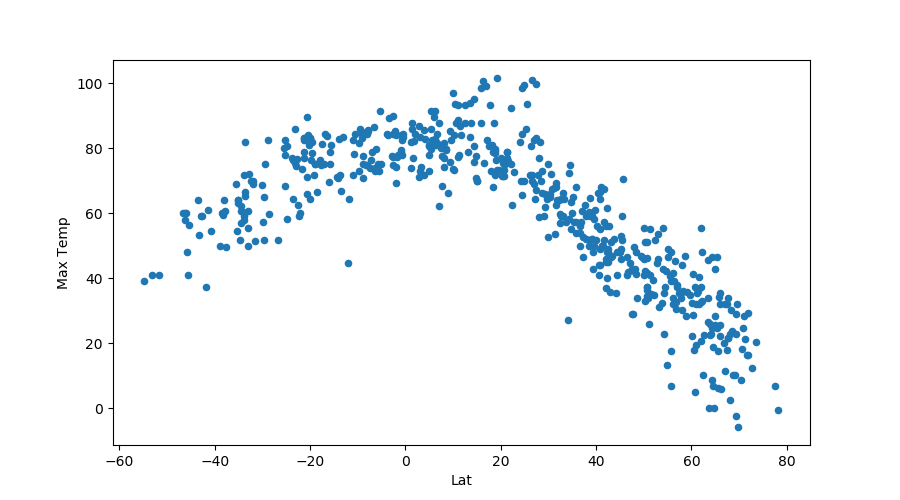

In [11]:
cities_df.plot(kind='scatter', x='Lat', y='Max Temp')
plt.savefig("output_data/All_Lat_vs_MaxTem.png")

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


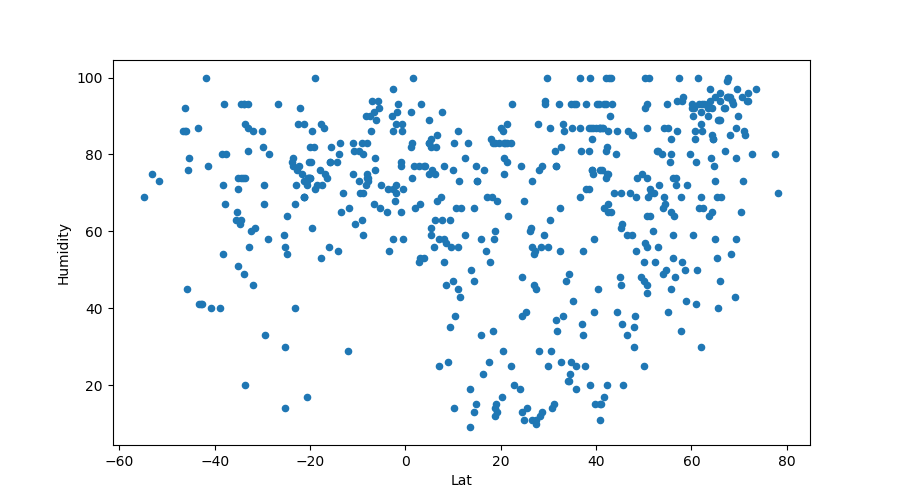

In [12]:
cities_df.plot(kind='scatter', x='Lat', y='Humidity')
plt.savefig("output_data/All_Lat_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


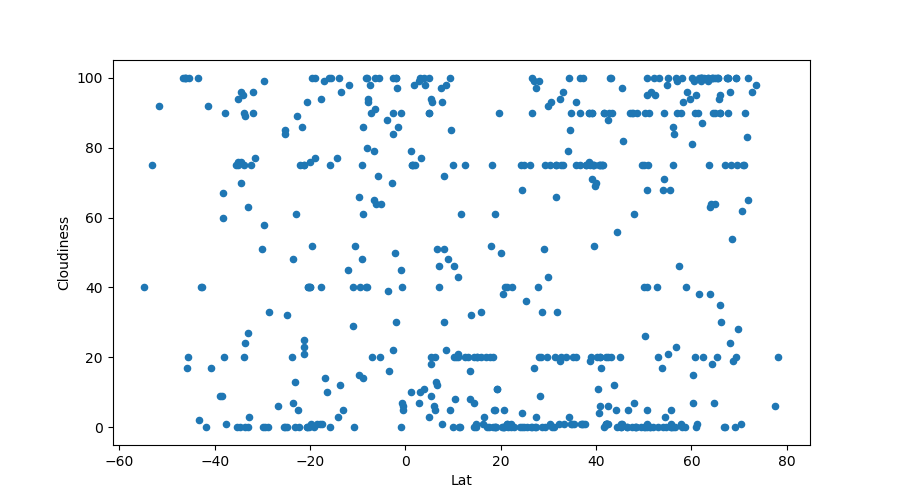

In [13]:
cities_df.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.savefig("output_data/All_Lat_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


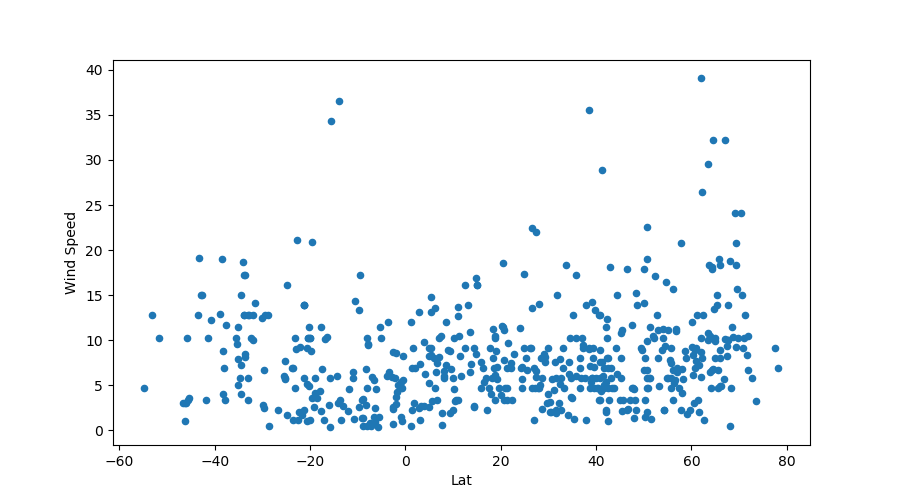

In [14]:
cities_df.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.savefig("output_data/All_Lat_vs_WindSpeed.png")

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def create_scatter_plot(df,xx,yy):
    df.plot(kind='scatter', x=xx, y=yy)
    
    correlation = st.pearsonr(df[xx], df[yy])

    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[xx], df[yy])
    regress_values = df[xx] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(df[xx],regress_values,"r-")
    
   
    # find the function annotation x-axis coordinate
    # quantile function is used here for convenience
    pick = .1
    quartiles = df[xx].quantile([pick,.5,.75])
    x_coor = quartiles[pick]

    # find the function annotation y-axis coordinate
    quartiles = df[yy].quantile([pick,.5,.75])
    y_coor = quartiles[pick]

    plt.annotate(line_eq,(x_coor,y_coor),fontsize=15,color="red")
    print(f"The correlation between both factors is {correlation[0]}")
    print(f"The correlation coefficient (rvalue) is {rvalue}")
    print(f"The pvalue is {pvalue}")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [16]:
# Create Northern and Southern Hemisphere DataFrames
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bairiki,75,KI,1586153009,74,1.33,172.98,86.00,2.24
1,leh,79,IN,1586152770,21,34.17,77.58,27.27,1.66
2,esperance,90,AU,1586153010,49,-33.87,121.90,71.60,12.75
3,upernavik,96,GL,1586152985,80,72.79,-56.15,12.29,5.79
4,cape town,75,ZA,1586152725,93,-33.93,18.42,57.99,12.75
...,...,...,...,...,...,...,...,...,...
551,gornyye klyuchi,0,RU,1586153729,46,45.25,133.50,49.12,10.80
552,logan,90,US,1586153730,66,41.74,-111.83,57.20,4.70
553,bull savanna,52,JM,1586153730,84,17.89,-77.59,73.02,3.98
554,krasnofarfornyy,96,RU,1586153730,72,59.14,31.85,35.91,1.77


In [17]:
northern_df = cities_df[cities_df['Lat'] >= 0 ]
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bairiki,75,KI,1586153009,74,1.33,172.98,86.00,2.24
1,leh,79,IN,1586152770,21,34.17,77.58,27.27,1.66
3,upernavik,96,GL,1586152985,80,72.79,-56.15,12.29,5.79
7,aklavik,75,CA,1586153011,54,68.22,-135.01,30.20,4.70
10,taoudenni,0,ML,1586153012,20,22.68,-3.98,72.54,8.50
...,...,...,...,...,...,...,...,...,...
551,gornyye klyuchi,0,RU,1586153729,46,45.25,133.50,49.12,10.80
552,logan,90,US,1586153730,66,41.74,-111.83,57.20,4.70
553,bull savanna,52,JM,1586153730,84,17.89,-77.59,73.02,3.98
554,krasnofarfornyy,96,RU,1586153730,72,59.14,31.85,35.91,1.77


In [18]:
southern_df = cities_df[cities_df['Lat'] <= 0 ]
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,esperance,90,AU,1586153010,49,-33.87,121.90,71.60,12.75
4,cape town,75,ZA,1586152725,93,-33.93,18.42,57.99,12.75
5,castro,32,BR,1586152828,64,-24.79,-50.01,58.10,1.66
6,coquimbo,0,CL,1586153011,82,-29.95,-71.34,57.20,2.82
8,rikitea,0,PF,1586153012,67,-23.12,-134.97,75.43,10.22
...,...,...,...,...,...,...,...,...,...
530,quatre cocos,40,MU,1586153675,78,-20.21,57.76,82.99,11.41
538,necochea,9,AR,1586153677,80,-38.55,-58.74,60.01,18.99
542,turiacu,86,BR,1586153678,93,-1.66,-45.37,77.88,5.03
544,warragul,60,AU,1586153679,72,-38.17,145.93,60.01,4.00


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


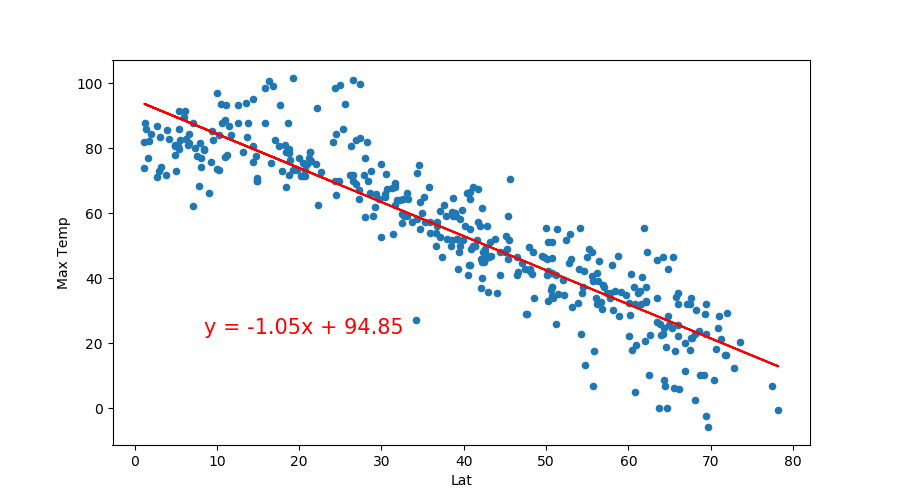

The correlation between both factors is -0.901791967277447
The correlation coefficient (rvalue) is -0.9017919672774469
The pvalue is 1.9320863932601963e-143
The r-squared is: 0.8132287522461279


In [19]:
create_scatter_plot(northern_df, 'Lat', 'Max Temp')
plt.savefig("output_data/Northern_Lat_vs_MaxTem.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


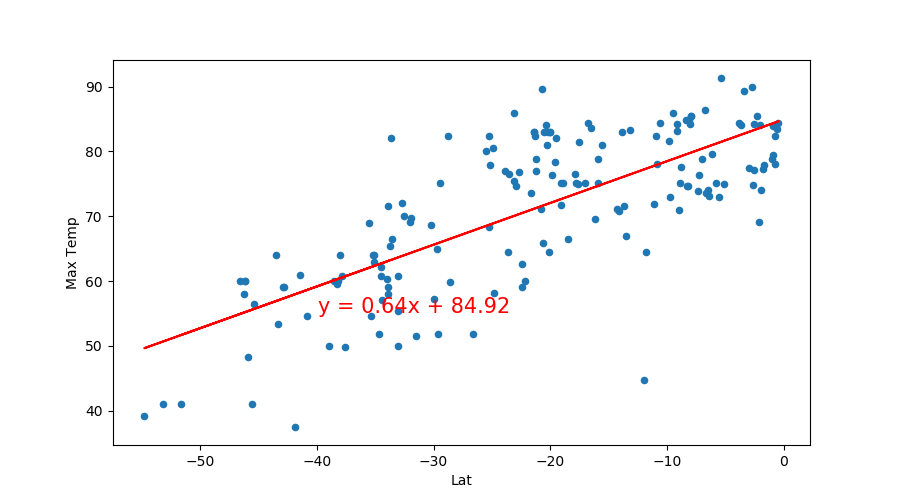

The correlation between both factors is 0.7422191607632364
The correlation coefficient (rvalue) is 0.7422191607632367
The pvalue is 2.595354303172908e-30
The r-squared is: 0.5508892826040834


In [20]:
create_scatter_plot(southern_df, 'Lat', 'Max Temp')
plt.savefig("output_data/Southern_Lat_vs_MaxTem.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


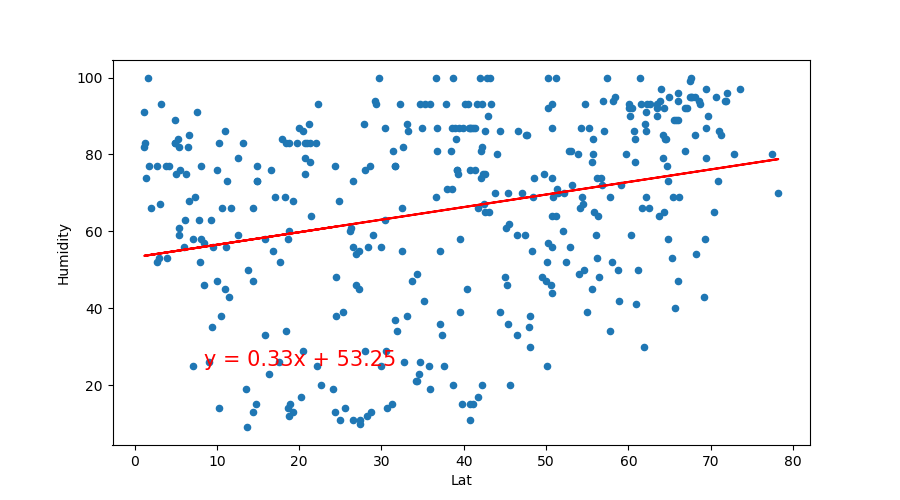

The correlation between both factors is 0.27082044218510254
The correlation coefficient (rvalue) is 0.27082044218510254
The pvalue is 5.542456770089105e-08
The r-squared is: 0.07334371190533447


In [21]:
create_scatter_plot(northern_df, 'Lat', 'Humidity')
plt.savefig("output_data/Northern_Lat_vs_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


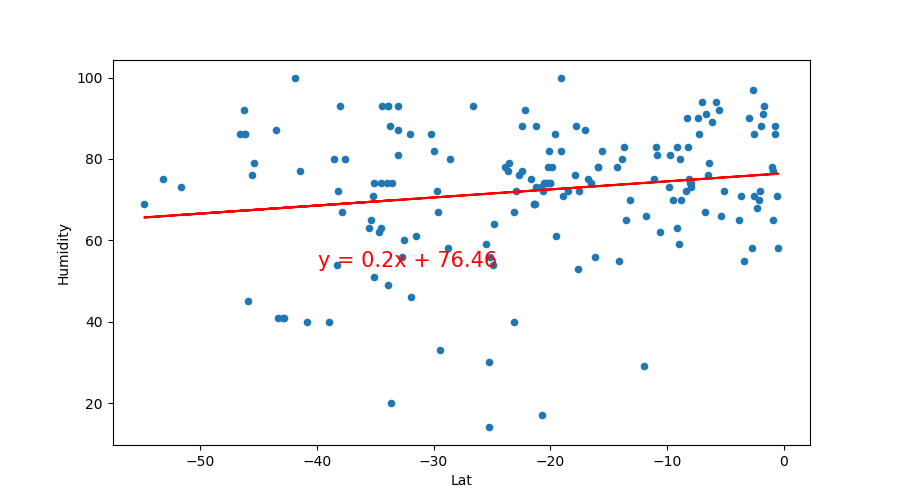

The correlation between both factors is 0.1687228266299527
The correlation coefficient (rvalue) is 0.1687228266299527
The pvalue is 0.029778917803351505
The r-squared is: 0.028467392226001073


In [22]:
create_scatter_plot(southern_df, 'Lat', 'Humidity')
plt.savefig("output_data/Southern_Lat_vs_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


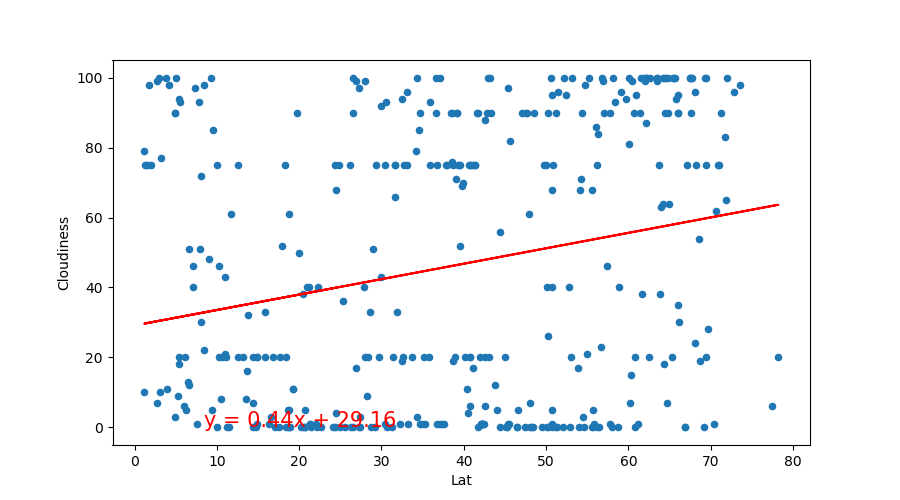

The correlation between both factors is 0.22841631197071705
The correlation coefficient (rvalue) is 0.22841631197071688
The pvalue is 5.194842906296444e-06
The r-squared is: 0.05217401157430386


In [23]:
create_scatter_plot(northern_df, 'Lat', 'Cloudiness')
plt.savefig("output_data/Southern_Lat_vs_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


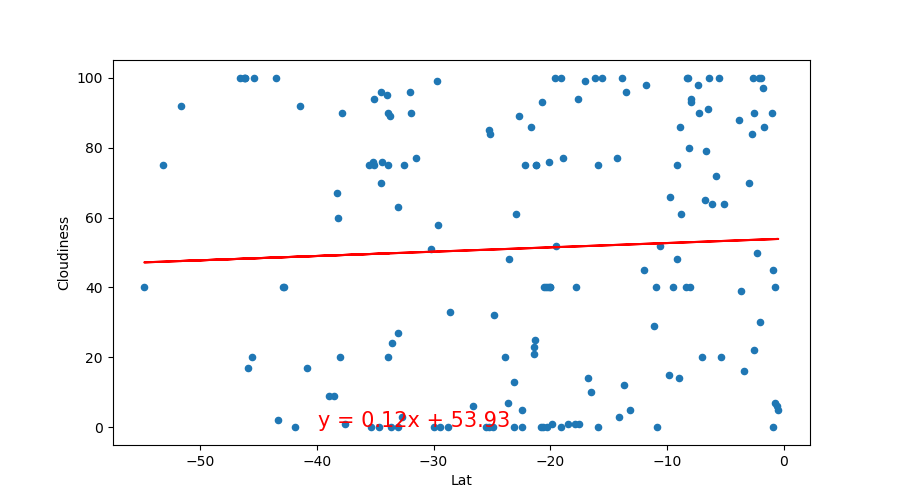

The correlation between both factors is 0.04563997607082662
The correlation coefficient (rvalue) is 0.04563997607082659
The pvalue is 0.5592936556279045
The r-squared is: 0.002083007415745624


In [24]:
create_scatter_plot(southern_df, 'Lat', 'Cloudiness')
plt.savefig("output_data/Southern_Lat_vs_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


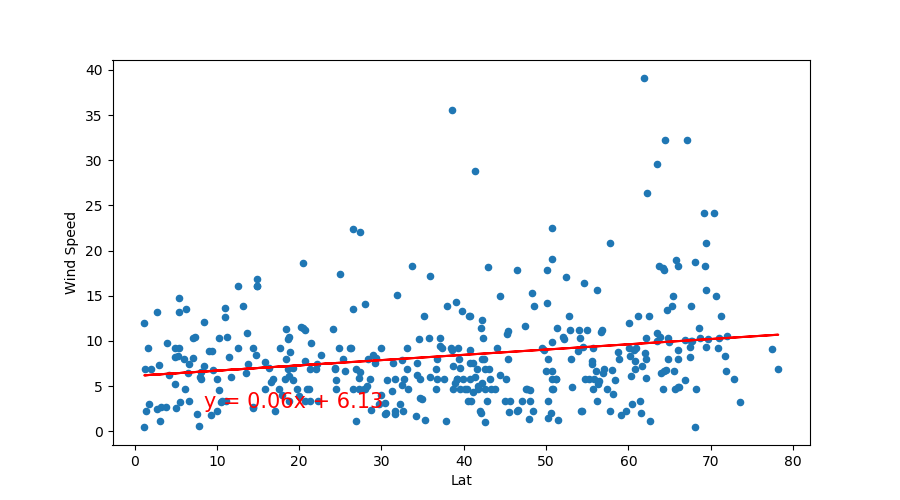

The correlation between both factors is 0.2134473957719315
The correlation coefficient (rvalue) is 0.21344739577193148
The pvalue is 2.1300406305830546e-05
The r-squared is: 0.04555979076181955


In [25]:
create_scatter_plot(northern_df, 'Lat', 'Wind Speed')
plt.savefig("output_data/Northern_Lat_vs_WindSpeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


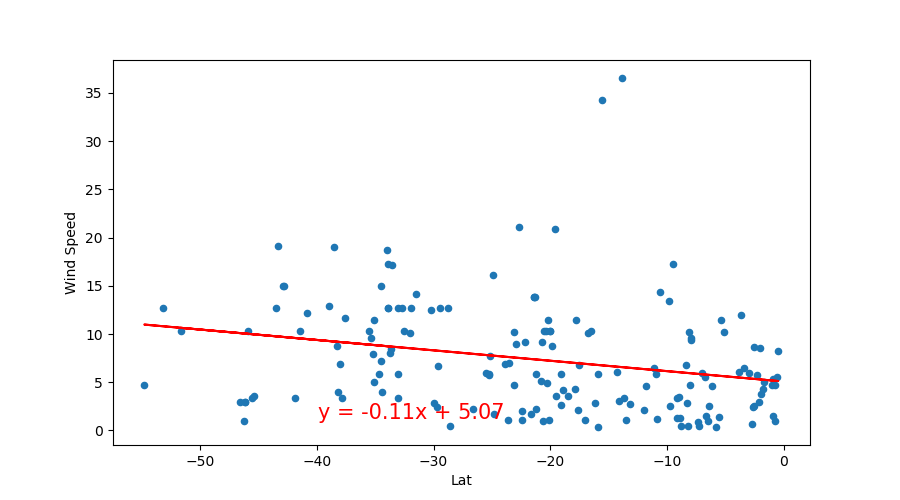

The correlation between both factors is -0.25455642554819646
The correlation coefficient (rvalue) is -0.25455642554819646
The pvalue is 0.0009341588838715755
The r-squared is: 0.06479897378787448


In [26]:
create_scatter_plot(southern_df, 'Lat', 'Wind Speed')
plt.savefig("output_data/Southern_Lat_vs_WindSpeed.png")